In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('diabetes.csv')#Reading data
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [3]:
df.isnull().sum()#Check if the Data is clean

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.duplicated().sum()#Check if there is a duplication

0

In [5]:
#EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

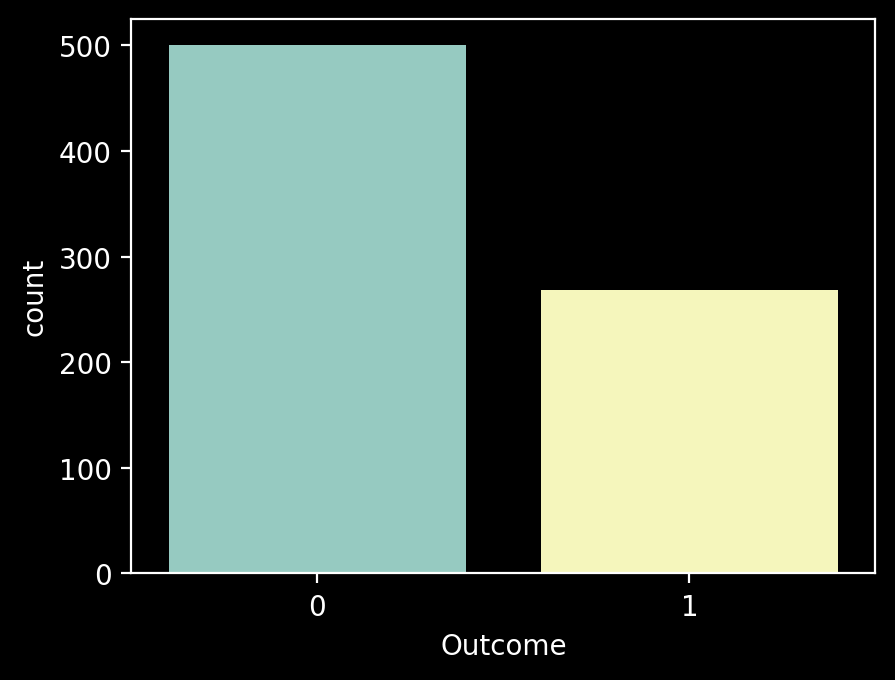

In [8]:
#display the Outcome
sns.countplot(data=df,x='Outcome');

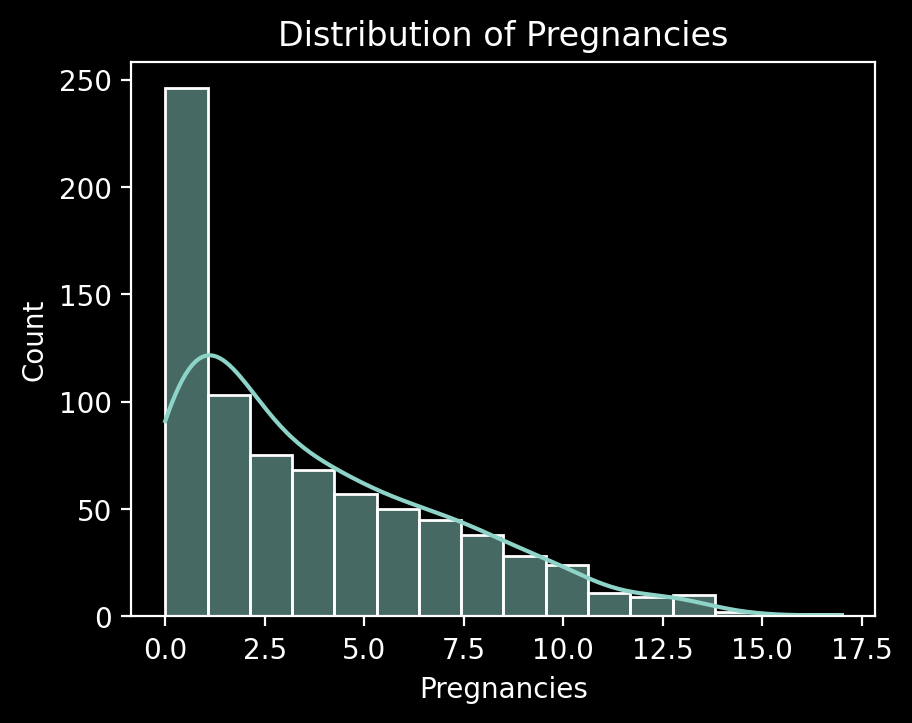

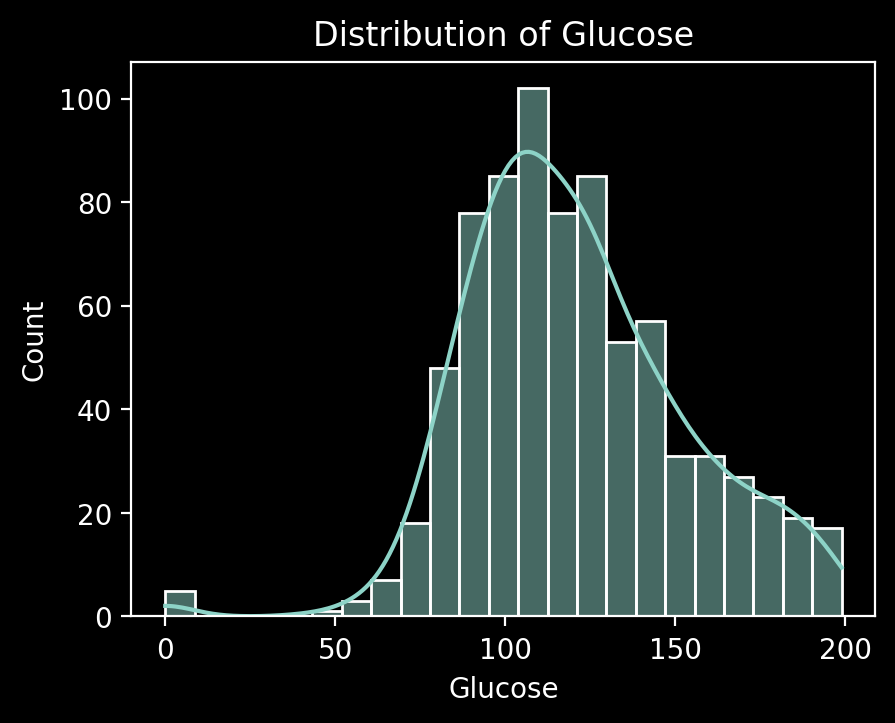

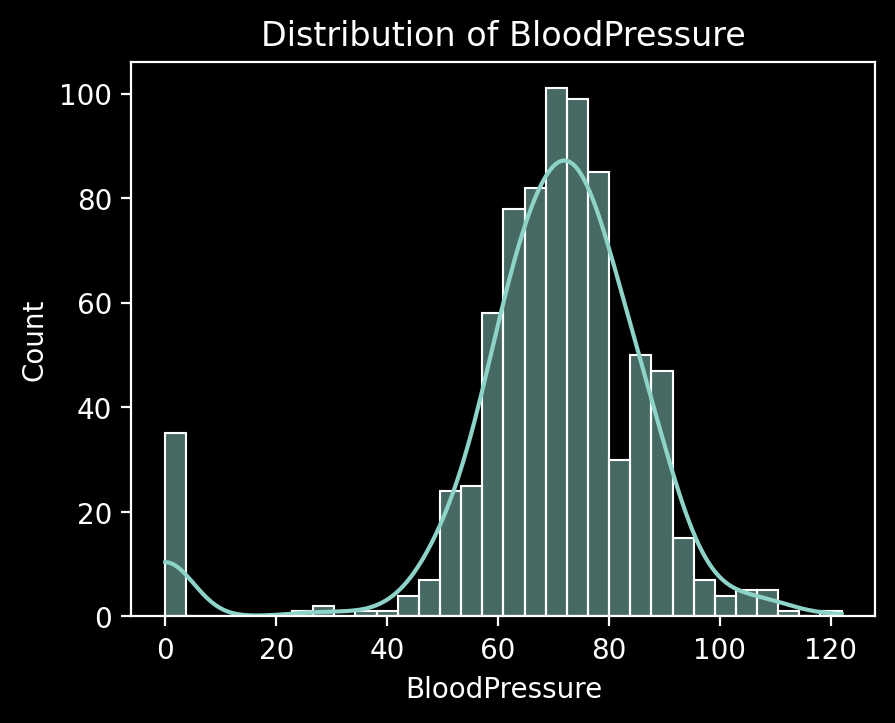

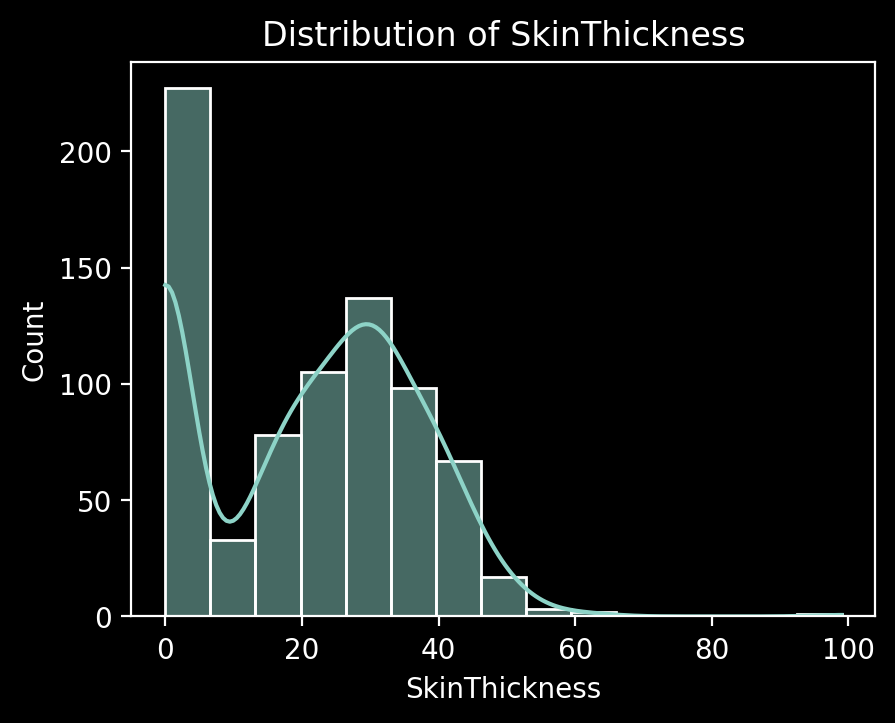

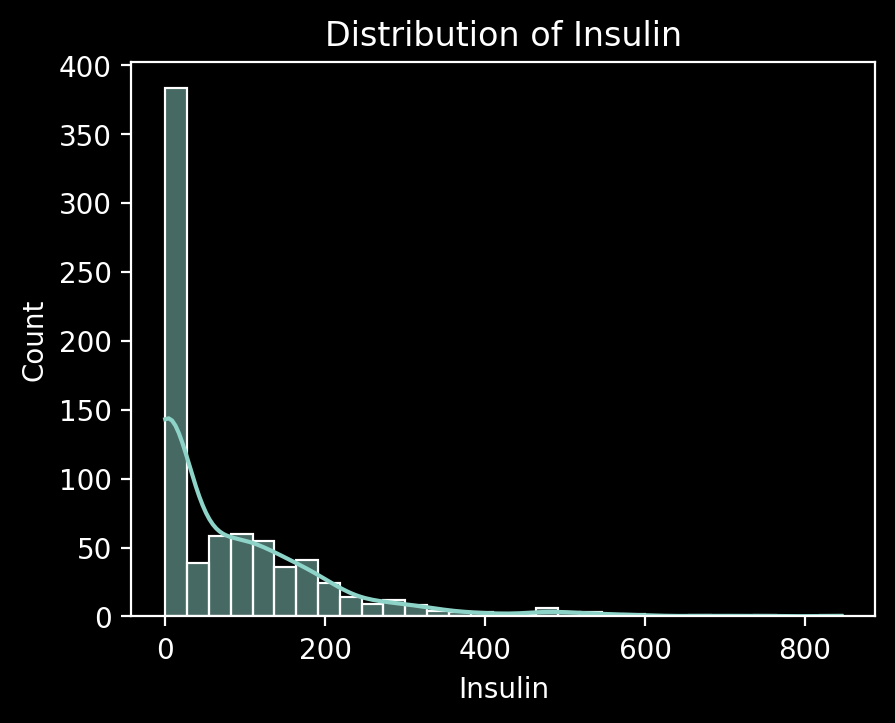

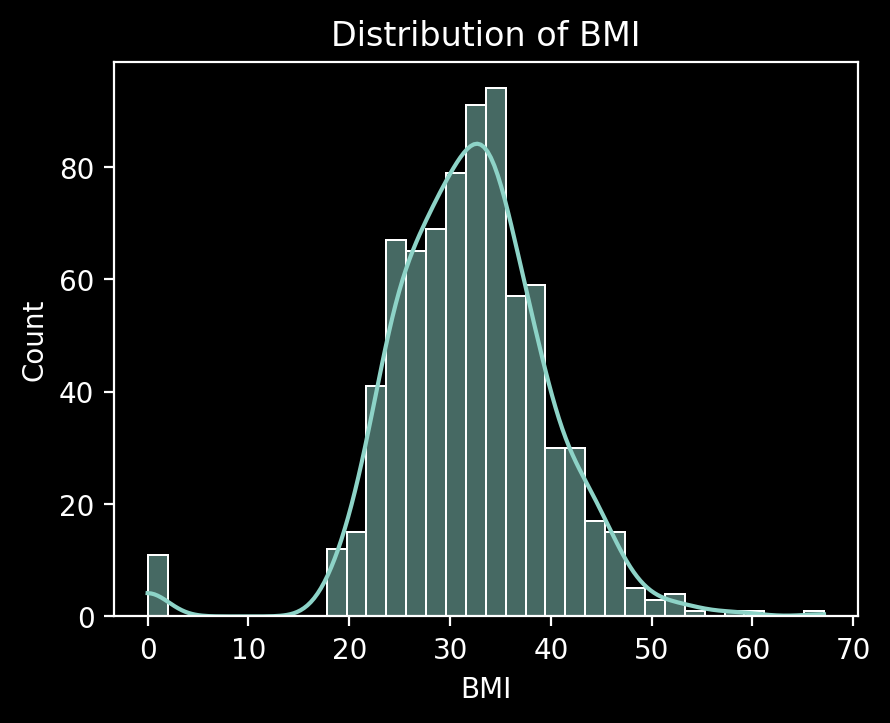

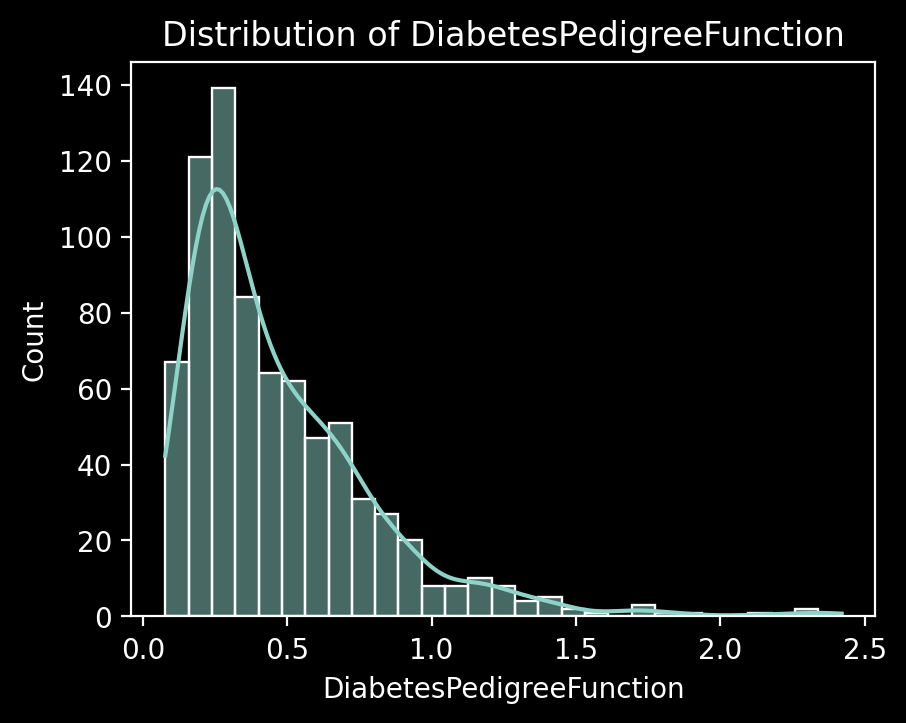

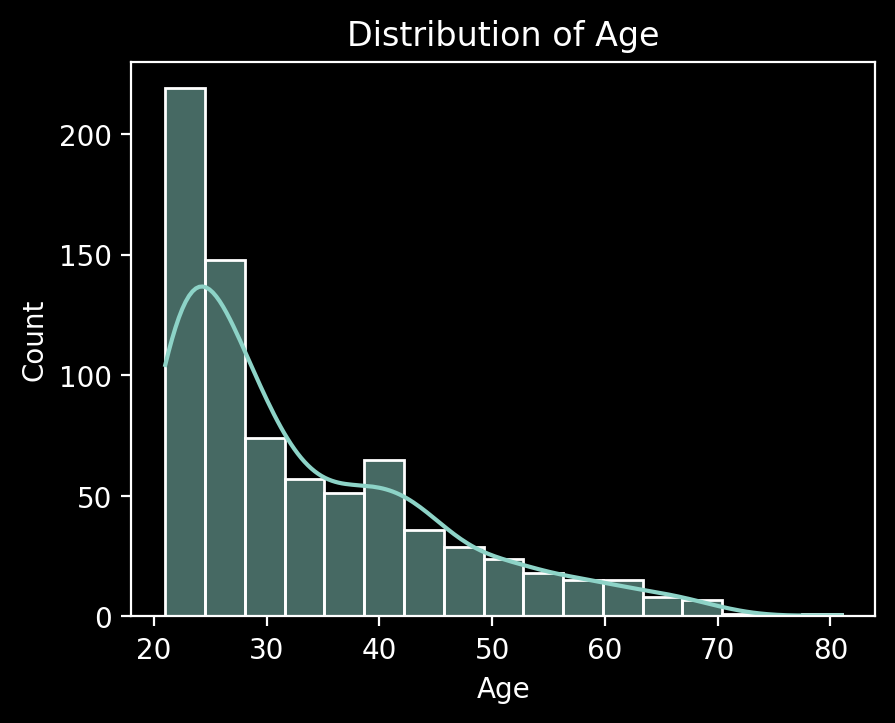

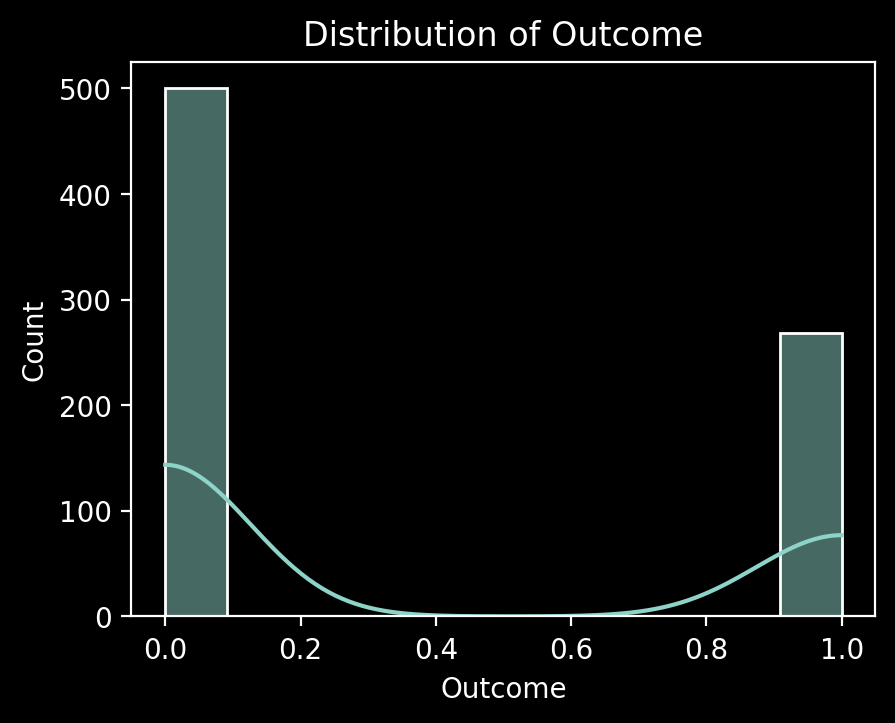

In [9]:
# Plot distributions for each column
for col in df.columns:
    plt.figure()
    sns.histplot(df[col], kde=True);
    plt.title(f'Distribution of {col}')

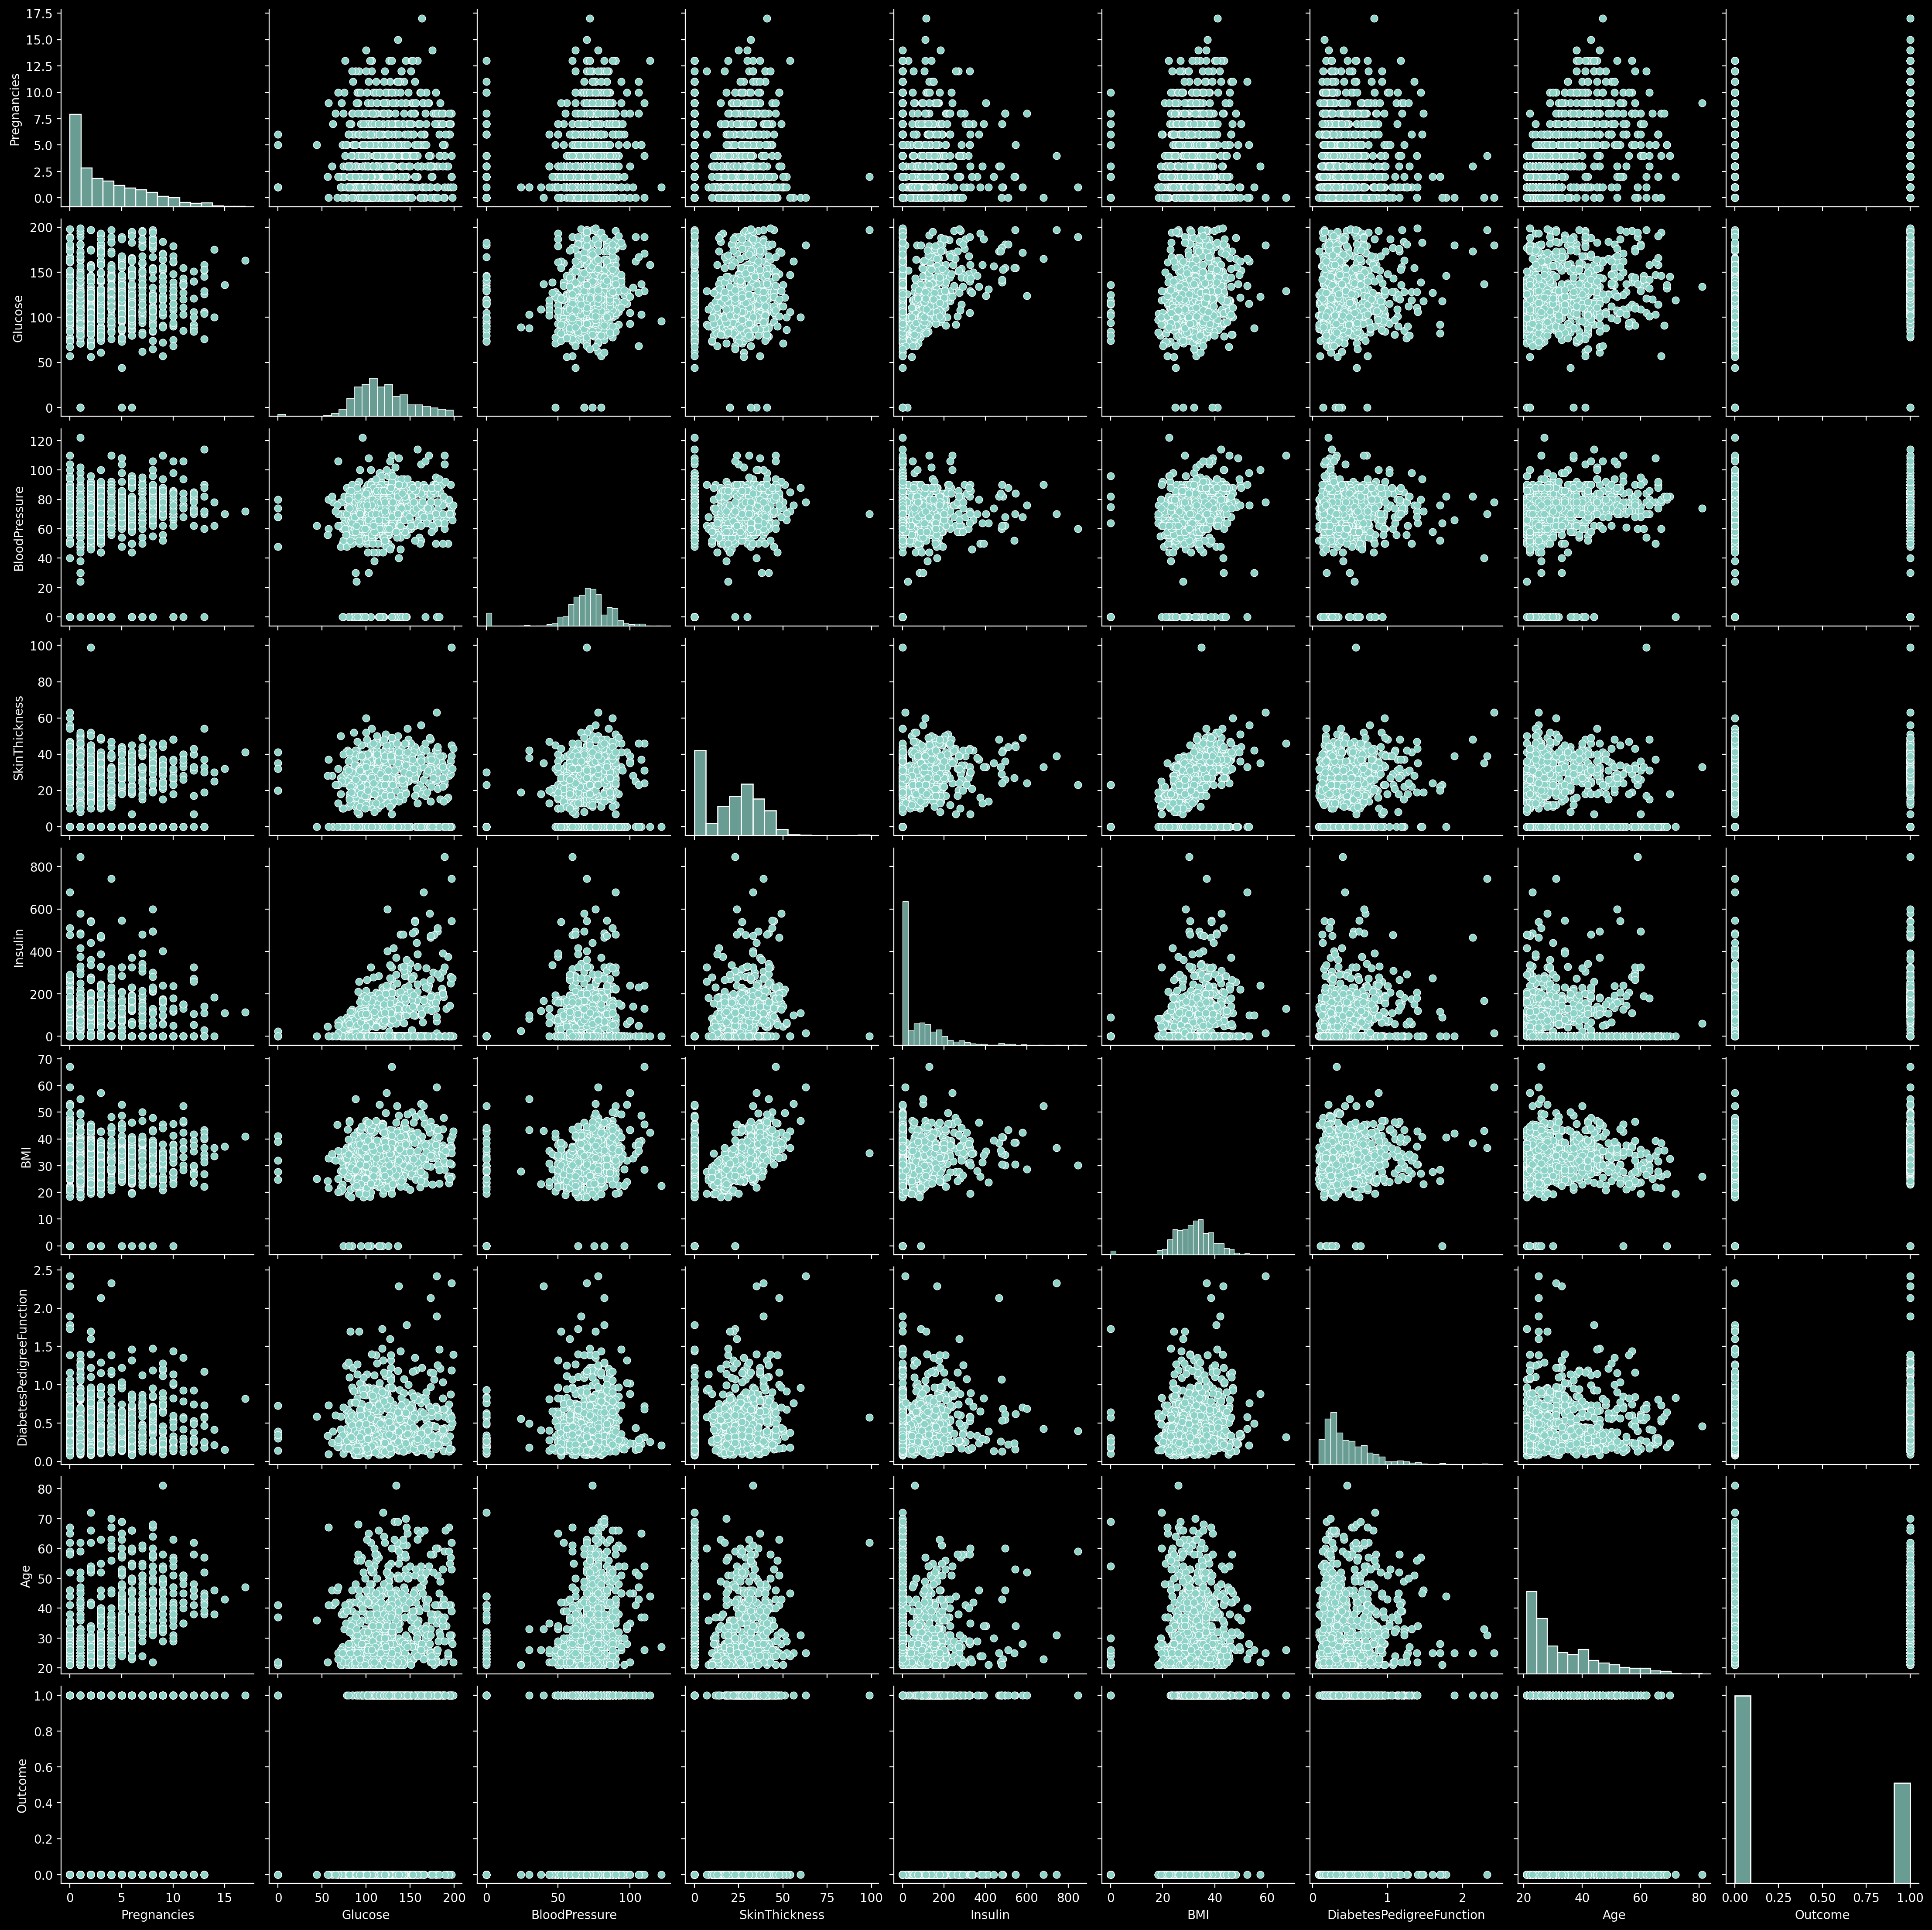

In [10]:
sns.pairplot(df);

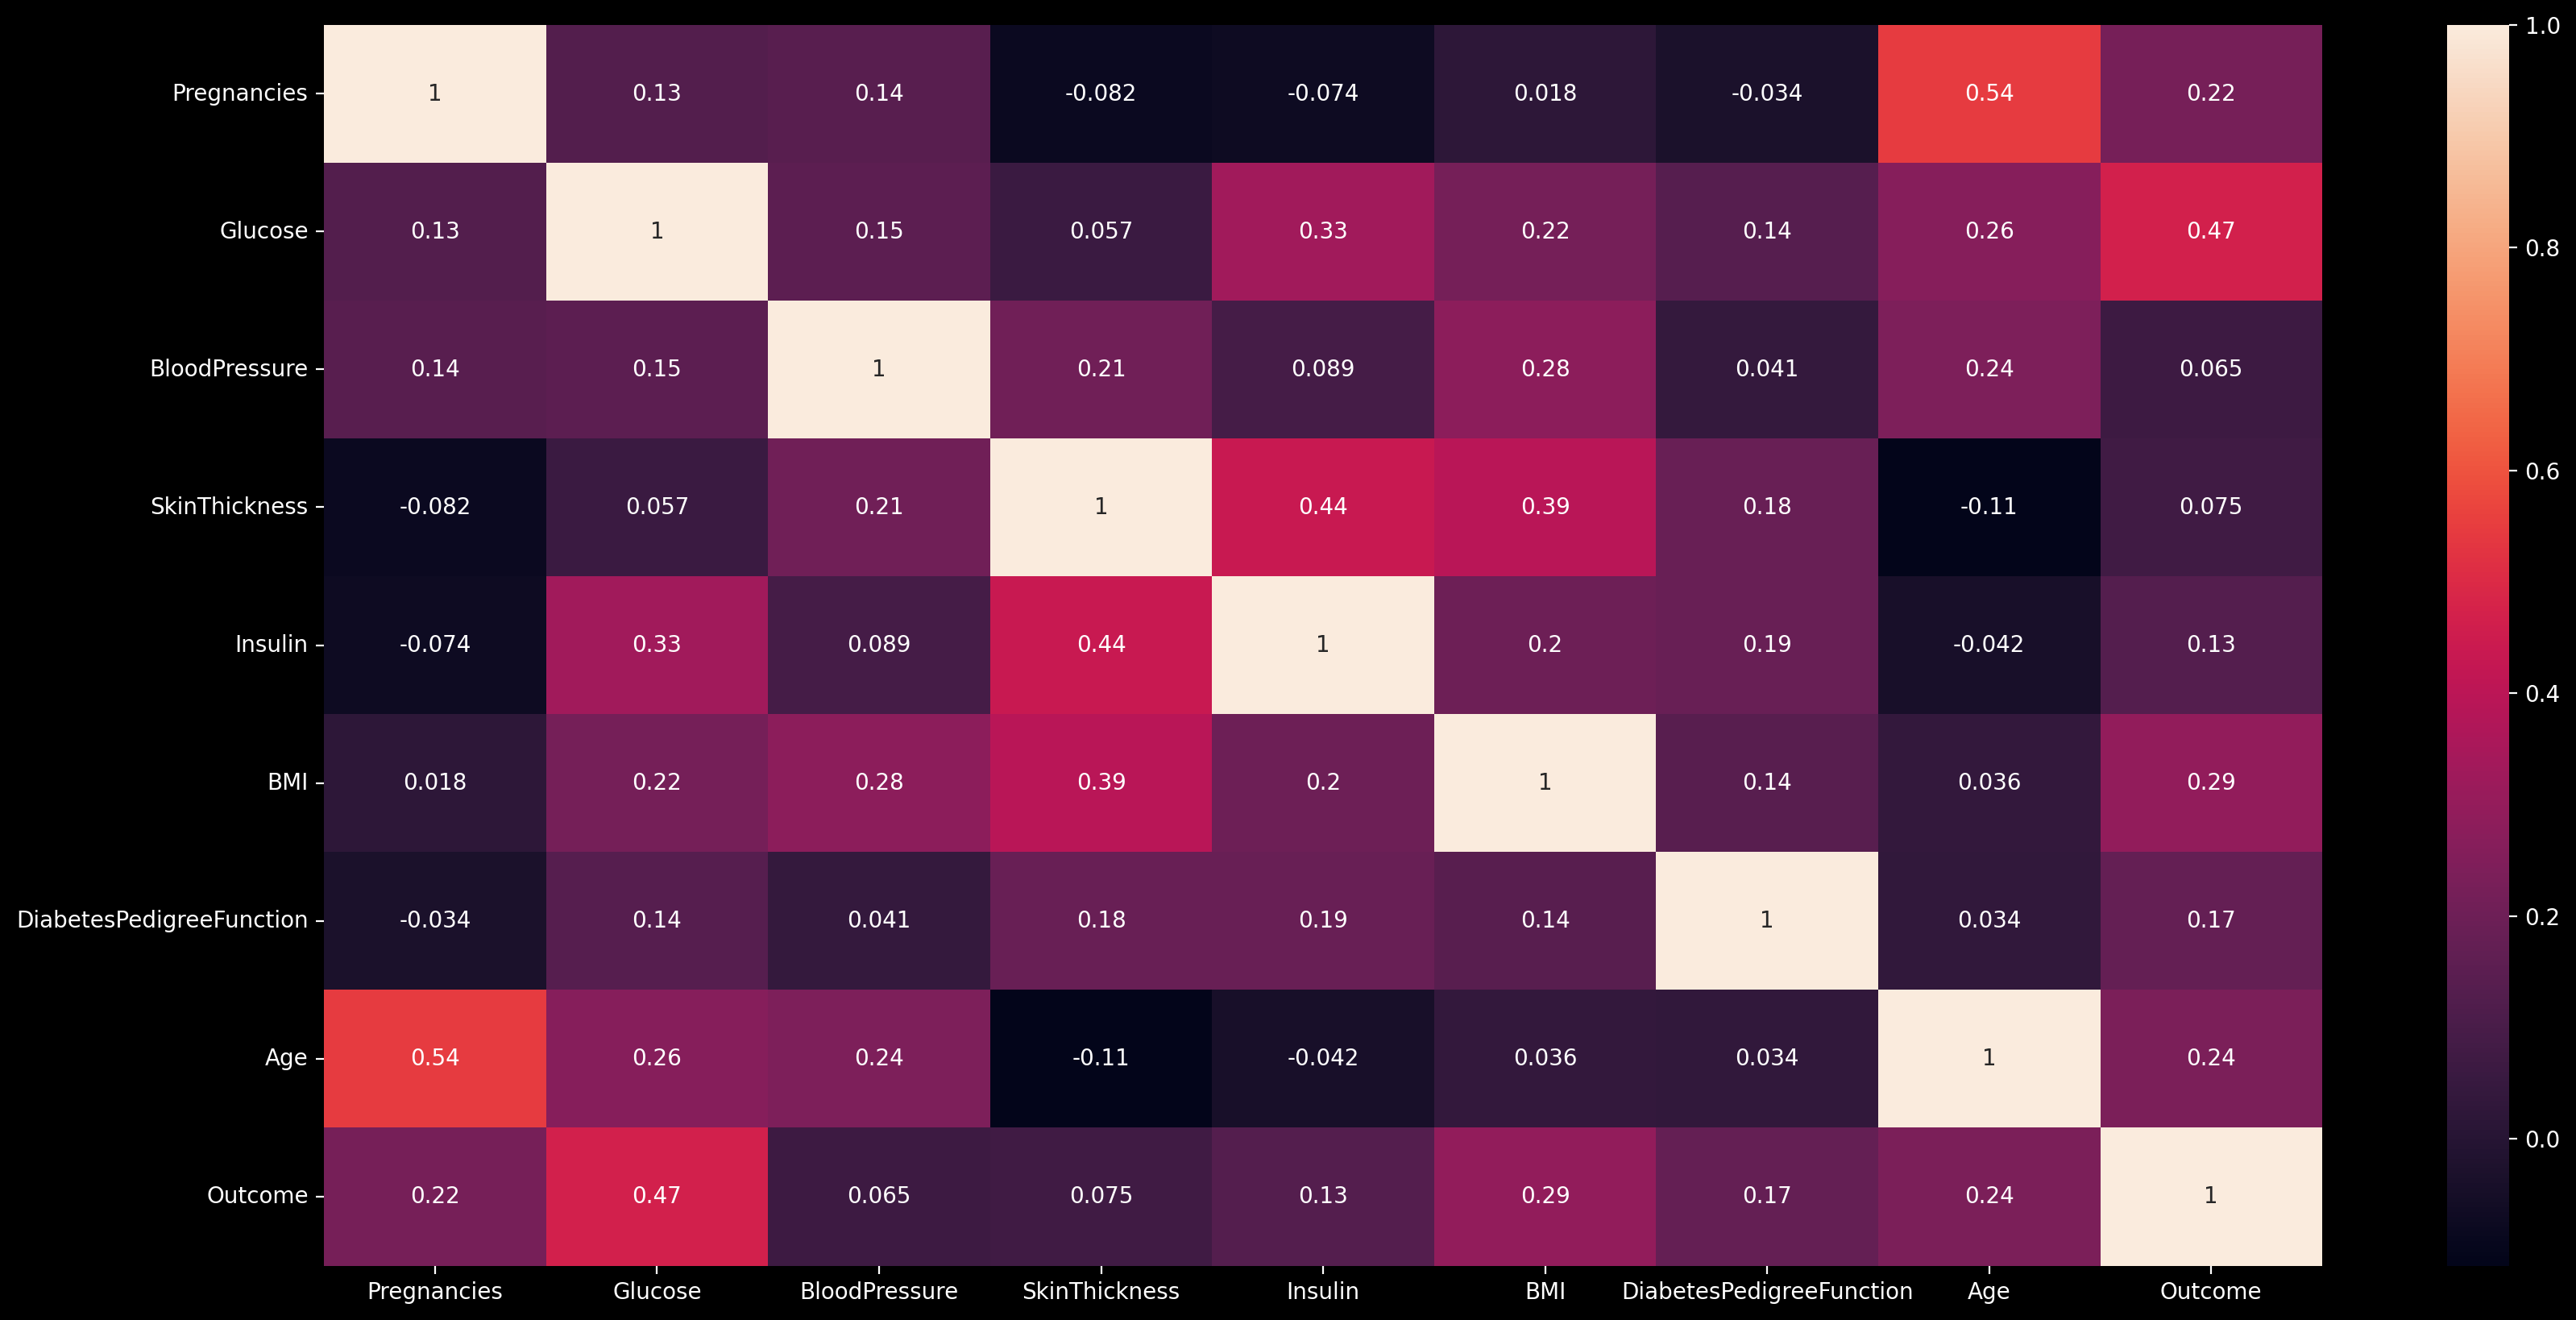

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True);

In [12]:
#now I will split my data

In [13]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [14]:
#logistic regression

In [15]:
x = np.array(x)
y = np.array(y)

In [16]:
# Mean X and Y
mean_x = np.mean(x,axis=0)
mean_y = np.mean(y)

In [17]:
mean_x

array([  3.84505208, 120.89453125,  69.10546875,  20.53645833,
        79.79947917,  31.99257812,   0.4718763 ,  33.24088542])

In [18]:
mean_y

0.3489583333333333

In [19]:
#Total number of values
m = len(y)

In [20]:
#Using the formula to calculate b1 and b0
b1 = []
#equation: m=E (x-x mean)(y-y mean) / (x-x mean)^2
x_centered = x - mean_x
y_centered = y - mean_y

# Calculating the coefficients b1

for i in range(x.shape[1]):
    numerator = np.sum(x_centered[:,i]*y_centered)
    denominator = np.sum(x_centered[:, i]**2)
    b1.append(numerator/denominator)

# Calculating the intercept b0
b1 = np.array(b1)
b0 = mean_y - np.dot(b1, mean_x)
# Printing coefficients
print('b1 (coefficients) =', b1)
print('b0 (intercept) =', b0)

b1 (coefficients) = [0.03140887 0.00696023 0.00160337 0.002235   0.00054029 0.01770653
 0.25025056 0.00966683]
b0 (intercept) = -1.8189776941615483


In [21]:
#Sigmoid function

In [22]:
def Sigmoid(z):
    return 1/(1+(np.exp(-z)))

In [23]:
# Predict function
y_pred = []

for i in range(m):
    y_p = np.dot(b1,x[i]) + b0
    y_pred.append(Sigmoid(y_p))
y_pred = np.array(y_pred)

In [24]:
# Convert probabilities to class labels
y_pred_class = (y_pred >= 0.66).astype(int)

In [25]:
y_pred_class

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [26]:
# Evaluate the model
accuracy = np.mean(y_pred_class == y)
print('Accuracy:', accuracy)

Accuracy: 0.7591145833333334


In [27]:
report = classification_report(y, y_pred_class)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       500
           1       0.72      0.51      0.60       268

    accuracy                           0.76       768
   macro avg       0.75      0.70      0.71       768
weighted avg       0.75      0.76      0.75       768



In [28]:
predictions = pd.DataFrame(y_pred_class,columns=['predictions'])
predictions['y_pred'] = np.array(y_pred)
predictions['Actual'] = y
predictions.head(60)

predictions    y_pred  Actual
0             1  0.696026       1
1             0  0.458394       0
2             1  0.667899       1
3             0  0.445778       0
4             1  0.735446       1
5             0  0.514420       0
6             0  0.469957       1
7             0  0.558345       0
8             1  0.770851       1
9             0  0.509077       1
10            0  0.555609       0
11            1  0.714835       1
12            1  0.727568       0
13            1  0.791751       1
14            1  0.699024       1
15            0  0.514637       1
16            0  0.649045       1
17            0  0.537834       1
18            0  0.559394       0
19            0  0.574046       1
20            0  0.655879       0
21            0  0.613794       0
22            1  0.754603       1
23            0  0.588582       1
24            1  0.736880       1
25            0  0.644725       1
26            1  0.673381       1
27            0  0.462047       0
28            1  0.697907       0
29            0  0.587924       0
30            0  0.652303       0
31            1  0.679791       1
32            0  0.438590       0
33            0  0.456958       0
34            0  0.643467       0
35            0  0.570271       0
36            0  0.654796       0
37            0  0.639186       1
38            0  0.534054       1
39            1  0.722656       1
40            0  0.656013       0
41            1  0.669279       0
42            0  0.562463       0
43            1  0.820523       1
44            0  0.635430       0
45            1  0.747613       1
46            0  0.566056       0
47            0  0.441691       0
48            0  0.592235       1
49            0  0.363556       0
50            0  0.451538       0
51            0  0.465063       0
52            0  0.480854       0
53            1  0.788169       1
54            1  0.736818       0
55            0  0.376451       0
56            1  0.766800       1
57            0  0.641240       0
58            1  0.714398       0
59            0  0.543292       0

In [29]:
#Logistic Regression by scikit-learn

In [30]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(x_train,y_train)

/var/mobile/Containers/Data/Application/2A951E18-2F41-432E-B643-71D50B2320F9/Library/Application Support/com.rationalmatter.junoapp/python-home/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
predictions = lr.predict(x_test)
predictions = pd.DataFrame(predictions,columns=['predictions by scikit-learn'])
predictions['Actual'] = np.array(y_test)

In [35]:
predictions

predictions by scikit-learn  Actual
0                              0       1
1                              1       0
2                              1       1
3                              0       1
4                              0       0
..                           ...     ...
149                            0       0
150                            0       0
151                            1       0
152                            0       0
153                            0       1

[154 rows x 2 columns]

In [36]:
lr.score(x_test,y_test)

0.8311688311688312

In [37]:
report = classification_report(y_test,predictions['predictions by scikit-learn'])
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       101
           1       0.81      0.66      0.73        53

    accuracy                           0.83       154
   macro avg       0.83      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154



In [38]:
#Comparison of Logistic regression manually and scikit-learn

In [39]:
predictions['predictions by manual'] = y_pred_class[614:]
predictions.tail(60)

predictions by scikit-learn  Actual  predictions by manual
94                             0       0                      1
95                             1       0                      0
96                             0       0                      0
97                             0       0                      0
98                             0       0                      1
99                             1       0                      0
100                            0       1                      0
101                            1       1                      1
102                            0       0                      1
103                            1       1                      0
104                            1       1                      0
105                            0       0                      0
106                            1       1                      0
107                            0       0                      0
108                            1       1                      0
109                            0       0                      0
110                            0       0                      0
111                            0       0                      0
112                            0       0                      0
113                            0       0                      0
114                            0       0                      0
115                            1       1                      0
116                            1       0                      0
117                            0       0                      0
118                            0       0                      1
119                            0       0                      0
120                            0       0                      0
121                            1       1                      0
122                            0       0                      0
123                            0       0                      0
124                            0       0                      0
125                            0       1                      0
126                            0       1                      1
127                            1       1                      0
128                            0       0                      0
129                            1       1                      1
130                            0       0                      1
131                            0       0                      0
132                            0       0                      1
133                            1       0                      0
134                            0       0                      1
135                            0       0                      0
136                            0       0                      0
137                            0       0                      0
138                            0       0                      0
139                            1       1                      1
140                            0       0                      1
141                            0       0                      0
142                            0       0                      0
143                            0       0                      0
144                            1       1                      0
145                            1       0                      1
146                            0       0                      0
147                            1       1                      1
148                            1       1                      0
149                            0       0                      1
150                            0       0                      0
151                            1       0                      0
152                            0       0                      0
153                            0       1                      0